In [1]:
import json

with open('test1.json') as f:
   initial_data = json.load(f)

with open('test2.json') as f2:
   initial2_data = json.load(f2)
# print(type(initial_data))
# print(initial_data.keys())
# print(type(initial_data['pages']))

x = initial_data['pages'][0]['words']


word_detail_list = []
for i in x:
    if i['text'] is not None:
        word_detail_list.append(i)
print(word_detail_list[0], len(word_detail_list))

word_text_list = []
for i in x:
    if i['text'] is not None:
        word_text_list.append(i['text'])
print(word_text_list[0], len(word_text_list))

word_vertex_list = []
for i in x:
    if i['text'] is not None:
        q = i['boundingBox']['vertices'][0]['x']
        w = i['boundingBox']['vertices'][0]['y']
        word_vertex_list.append((q,w))
print(type(word_vertex_list[0]),word_vertex_list[0], len(word_vertex_list))

{'id': 'b6647d94-a70a-45a4-8c6f-dc5c15ac2786', 'text': 'Page', 'confidence': 98.5125, 'boundingBox': {'vertices': [{'x': 1215.94021572, 'y': 80.51687888000001}, {'x': 1283.507001, 'y': 80.51687888000001}, {'x': 1283.507001, 'y': 113.98039248}, {'x': 1215.94021572, 'y': 113.98039248}]}} 438
Page 438
<class 'tuple'> (1215.94021572, 80.51687888000001) 438


In [2]:
x2 = initial2_data['pages'][0]['words']

word_detail_list2 = []
for i in x2:
    if i['text'] is not None:
        word_detail_list2.append(i)
print(word_detail_list2[0], len(word_detail_list2))

word_text_list2 = []
for i in x2:
    if i['text'] is not None:
        word_text_list2.append(i['text'])
print(word_text_list2[0], len(word_text_list2))

word_vertex_list2 = []
for i in x2:
    if i['text'] is not None:
        q = i['boundingBox']['vertices'][0]['x']
        w = i['boundingBox']['vertices'][0]['y']
        word_vertex_list2.append((q,w))
print(type(word_vertex_list2[0]),word_vertex_list2[0], len(word_vertex_list2))

{'id': '032267f5-fd70-4558-b00f-0b9856bcfb83', 'text': 'Page', 'confidence': 98.5125, 'boundingBox': {'vertices': [{'x': 1215.94021572, 'y': 80.51687888000001}, {'x': 1283.507001, 'y': 80.51687888000001}, {'x': 1283.507001, 'y': 113.98039248}, {'x': 1215.94021572, 'y': 113.98039248}]}} 467
Page 467
<class 'tuple'> (1215.94021572, 80.51687888000001) 467


In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
better_words_detail = []

for i in word_detail_list:
    if i['text'] not in stop_words:
        better_words_detail.append(i)
len(better_words_detail)

a = [j['text'] for j in better_words_detail]
print(a[0])
print(len(a))
# better_words_detail2 = []

# for i in word_detail_list2:
#     if i['text'] not in stop_words:
#         better_words_detail2.append(i)
# len(better_words_detail2)

# a2 = [j['text'] for j in better_words_detail]
# print(a2[0])

Page
413


In [6]:
def dist_cal(x1,y1, x2,y2):
    return (((x1-x2)**2)+((y1-y2)**2))**0.5

# word_vertex_list = [(1,1), (2,1), (1,3)]
v = word_vertex_list
v2 = word_vertex_list2

def vertexl_to_graph(v):
    l = len(v)
    g = []
    for i in range(l):
        g.append([])
        for j in range(l):
            c = dist_cal(*v[i], *v[j])
            g[i].append(c)
    return g

g = vertexl_to_graph(v)
g2 = vertexl_to_graph(v2)

print(len(g), len(g[0]), type(g))
print(len(g2), len(g2[0]), type(g2))

438 438 <class 'list'>
467 467 <class 'list'>


In [7]:
import random

randlist = []
def create_random_vertex_list(n):
    for i in range(n):
        a = random.randrange(0, 10)
        b = random.randrange(0, 10)
        randlist.append((a,b))
#   print(randlist)
    return randlist
g2r = create_random_vertex_list(10)
g2 = vertexl_to_graph(g2r)


In [5]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    
    ex1 = create_random_vertex_list(50)
    ex2 = vertexl_to_graph(ex1)
    
    data = {}
    data['distance_matrix'] = ex2
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    sol_list = []                                                  #Added later
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        sol_list.append(manager.IndexToNode(index))                 #Added later
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)
    print('list - out - ', sol_list)                                 #Added later

"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    print_solution(manager, routing, solution)

Objective: 56 miles
Route for vehicle 0:
 0 -> 36 -> 6 -> 52 -> 35 -> 14 -> 46 -> 51 -> 43 -> 50 -> 29 -> 9 -> 58 -> 44 -> 21 -> 1 -> 7 -> 31 -> 11 -> 16 -> 33 -> 17 -> 34 -> 3 -> 53 -> 57 -> 38 -> 37 -> 56 -> 40 -> 49 -> 47 -> 15 -> 19 -> 42 -> 41 -> 26 -> 55 -> 20 -> 54 -> 59 -> 8 -> 24 -> 28 -> 13 -> 5 -> 2 -> 4 -> 12 -> 45 -> 10 -> 25 -> 48 -> 27 -> 23 -> 32 -> 39 -> 18 -> 30 -> 22 -> 0

list - out -  [0, 36, 6, 52, 35, 14, 46, 51, 43, 50, 29, 9, 58, 44, 21, 1, 7, 31, 11, 16, 33, 17, 34, 3, 53, 57, 38, 37, 56, 40, 49, 47, 15, 19, 42, 41, 26, 55, 20, 54, 59, 8, 24, 28, 13, 5, 2, 4, 12, 45, 10, 25, 48, 27, 23, 32, 39, 18, 30, 22]


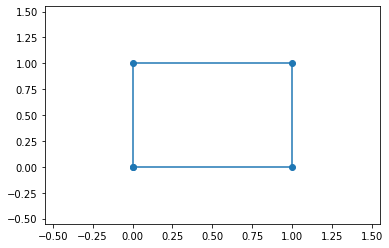

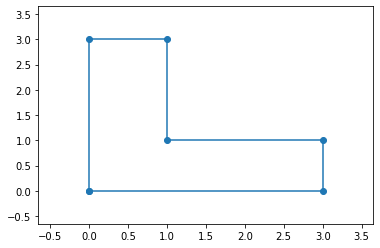

In [6]:
import matplotlib.pyplot as plt

rectangle = [(0,0),(0,1),(1,1),(1,0)]
hexagon = [(0,0),(0,1),(1,2),(2,1),(2,0),(1,-1)]
l_shape = [(0,0),(0,3),(1,3),(1,1),(3,1),(3,0)]
concave = [(0,0),(0,3),(1,3),(1,1),(2,1),(2,3),(3,3),(3,0)]

plt.plot(*zip(*(rectangle+rectangle[:1])), marker='o')
automin, automax = plt.xlim()
plt.xlim(automin-0.5, automax+0.5)
automin, automax = plt.ylim()
plt.ylim(automin-0.5, automax+0.5)
plt.savefig("{}.png".format('rec1'))
plt.show()

plt.plot(*zip(*(l_shape+l_shape[:1])), marker='o')

automin, automax = plt.xlim()
plt.xlim(automin-0.5, automax+0.5)
automin, automax = plt.ylim()
plt.ylim(automin-0.5, automax+0.5)
plt.savefig("{}.png".format('recomp1'))
plt.show()

for points in [word_vertex_list2]:
    plt.plot(*zip(*(points+points[:1])), marker='o')

    automin, automax = plt.xlim()
    plt.xlim(automin-0.5, automax+0.5)
    automin, automax = plt.ylim()
    plt.ylim(automin-0.5, automax+0.5)

    plt.show()

In [ ]:
# import cv2

# sift = cv2.SIFT_create()

# bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# img1=cv2.imread('rec1.png')
# img2=cv2.imread('recomp1.png')

# img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)

# matches = bf.match(des1,des2)
# matches = sorted(matches, key = lambda x:x.distance)

# img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[300:600], img2)
# cv2.imshow('SIFT', img3)
# cv2.waitKey(0)
# cv2.destroyALLWindows()

In [1]:
"""
Comparing images using ORB/SIFT feature detectors
and structural similarity index.
"""


from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

img00 = cv2.imread('rec1.png', 0)
img01 = cv2.imread('recomp1.png', 0)

img1 = cv2.imread('rec1.png', 0)  # 714 x 901 pixels
# img2 = cv2.imread('images/BSE_noisy.png', 0)  # 714 x 901 pixels
img3 = cv2.imread('recomp1.png', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.png', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(img1, img3)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
from skimage.transform import resize
img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(img1, img5) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)

Similarity using ORB is:  0.9387755102040817
Similarity using SSIM is:  0.8596074016884189


C:\Users\riddh\anaconda3\envs\BDS\lib\site-packages\skimage\_shared\utils.py:293: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
